In [1]:
import os
import subprocess
import multiprocessing
import resource
import matplotlib.pyplot as plt
import math
import scipy
from functools import lru_cache
from scipy.integrate import quad, dblquad, tplquad
from VLC_init import *
from pose_estimation import *
from rtof_pos import *
from Roberts import *

In [2]:
vlc_obj = VLC_init()

tx_coords = ((-5, 2), (-5, 3))
rx_coords = ((0, 0), (0, 1))

vlc_obj.update_coords(tx_coords, rx_coords)
vlc_obj.update_lookuptable()

aoa = Pose(vlc_obj)
rtof = RToF_pos(vlc_obj)
tdoa = Roberts(vlc_obj)

In [3]:
tx_aoa = aoa.estimate()
print("AoA finished")
tx_rtof = rtof.estimate()
print("RToF finished")
tx_tdoa = tdoa.estimate()
print("TDoA finished")

AoA finished
Distance:  5.085 Error:  0.014019513592784527
Distance:  5.37 Error:  0.015164807134503633
x:  -4.987729616127337
y:  1.9898375000000001
Distance:  5.37 Error:  0.015164807134503633
Distance:  5.835 Error:  0.004048105154699222
x:  -4.940161014440092
y:  3.1051624999999987
RToF finished
entered to if
x:  -5.000023497997459
y:  1.9999745740042694
TDoA finished


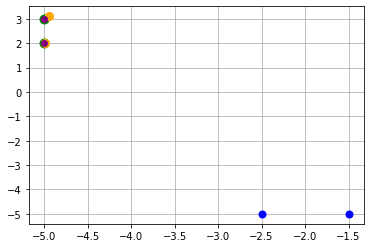

In [12]:
plt.figure()
plt.plot(vlc_obj.trxpos, vlc_obj.trypos,'o', color='green', markersize=9)
plt.plot(tx_rtof[0], tx_rtof[1], 'o', color='orange', markersize=8)
plt.plot(tx_aoa[0], tx_aoa[1], 'o', color='blue', markersize=7)
plt.plot(tx_tdoa[0], tx_tdoa[1], 'o', color='purple', markersize=6)
plt.grid()